In [49]:
import math
import numpy as np
import torch
from torch import nn
from d2l import torch as d2l

In [50]:
#生成数据
max_degree = 20
n_train,n_test = 100,100
true_w = np.zeros(max_degree)
true_w[0:4] = np.array([5,1.2,-3.4,5.6])

X = np.random.normal(size=(n_train + n_test, 1))
np.random.shuffle(X)
X_poly = np.power(X, np.arange(max_degree).reshape(1, -1))
for i in range(max_degree):
    X_poly[:,i] /= math.gamma(i + 1)
y = np.dot(X_poly,true_w)
y += np.random.normal(scale=0.1, size=y.shape)
X,y

(array([[ 3.83919868e-01],
        [ 8.44323823e-01],
        [-1.02023375e+00],
        [ 2.12701521e-01],
        [ 1.52158926e+00],
        [-7.83443997e-01],
        [-8.96077445e-01],
        [ 8.68753838e-01],
        [-4.99566618e-01],
        [ 5.06541450e-01],
        [-1.59088097e+00],
        [ 2.43156929e-02],
        [-2.73992120e+00],
        [-1.29964733e+00],
        [-8.47245186e-01],
        [-1.92498678e-01],
        [ 1.40897269e-02],
        [-3.65723335e-01],
        [ 2.03150151e+00],
        [ 1.02312409e+00],
        [ 8.15517622e-01],
        [ 2.61736518e-01],
        [-2.69407764e-01],
        [ 1.61120249e+00],
        [-7.49094892e-01],
        [ 1.52225116e+00],
        [ 4.27823438e-01],
        [-2.51798379e+00],
        [ 1.17931754e-01],
        [ 6.00781782e-02],
        [-1.20316411e-02],
        [-9.91701916e-02],
        [ 1.25505572e+00],
        [ 5.26747789e-01],
        [ 2.36831649e-01],
        [ 9.93683005e-01],
        [ 1.22398028e+00],
 

In [51]:
# NumPy ndarray转换为tensor
true_w, X,  X_poly, y = [torch.tensor(x, dtype=
    torch.float32) for x in [true_w, X, X_poly, y]]

X[:2], X_poly[:2, :], y[:2]

(tensor([[0.3839],
         [0.8443]]),
 tensor([[1.0000e+00, 3.8392e-01, 7.3697e-02, 9.4313e-03, 9.0521e-04, 6.9506e-05,
          4.4474e-06, 2.4392e-07, 1.1706e-08, 4.9935e-10, 1.9171e-11, 6.6910e-13,
          2.1407e-14, 6.3219e-16, 1.7336e-17, 4.4372e-19, 1.0647e-20, 2.4045e-22,
          5.1285e-24, 1.0363e-25],
         [1.0000e+00, 8.4432e-01, 3.5644e-01, 1.0032e-01, 2.1175e-02, 3.5757e-03,
          5.0318e-04, 6.0692e-05, 6.4055e-06, 6.0092e-07, 5.0737e-08, 3.8944e-09,
          2.7401e-10, 1.7797e-11, 1.0733e-12, 6.0414e-14, 3.1880e-15, 1.5834e-16,
          7.4271e-18, 3.3005e-19]]),
 tensor([5.2187, 5.3343]))

In [52]:
#定义训练函数
def train(X_train, y_train,X_test,y_test,num_epochs = 400): 
    #定义损失函数
    loss = nn.MSELoss(reduction='none')

    input_shape = X_train.shape[-1]
    #定义模型
    net = nn.Sequential(nn.Linear(input_shape,1,bias = False))
    batch_size = min(10, X_train.shape[0])
    train_iter = d2l.load_array((X_train, y_train.reshape(-1,1)),batch_size, True)
    test_iter = d2l.load_array((X_test, y_test.reshape(-1,1)),batch_size, False)
    trainer = torch.optim.SGD(net.parameters(),lr=0.01)
    #可视化
    animator = d2l.Animator(xlabel='epoch', ylabel='loss', yscale='log',
                        xlim=[1, num_epochs], ylim=[1e-3, 1e2],
                        legend=['train', 'test'])

    #训练 todo
    for epoch in range(num_epochs):
        d2l.train_epoch_ch3(net, train_iter, loss, trainer)
        if epoch == 0 or (epoch + 1) % 20 == 0:
            animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss),
                                 d2l.evaluate_loss(net, test_iter, loss)))
    print('weight:', net[0].weight.data)

weight: tensor([[ 5.0076,  1.1902, -3.3955,  5.6116]])


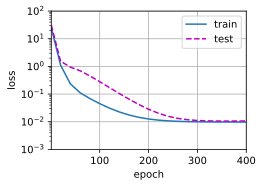

In [53]:
#训练

#选择三阶多项式训练（正常）
train(X_poly[:n_train,:4],y[:n_train],X_poly[n_train:,:4],y[n_train:])

weight: tensor([[3.3344, 4.0775]])


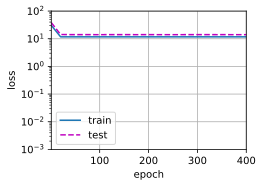

In [54]:
#线性函数拟合(欠拟合)
train(X_poly[:n_train,:2],y[:n_train],X_poly[n_train:,:2],y[n_train:])

weight: tensor([[ 5.0013,  1.2432, -3.3876,  5.2772,  0.0925,  1.0487,  0.0234,  0.0952,
          0.0806, -0.1499, -0.0996,  0.1321,  0.1386,  0.1521,  0.1883,  0.2102,
          0.0610,  0.0480, -0.2091,  0.1427]])


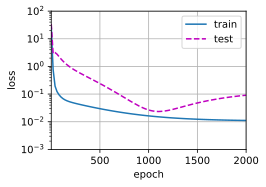

In [56]:
#高阶多项式函数拟合(过拟合)
train(X_poly[:n_train,:],y[:n_train],X_poly[n_train:,:],y[n_train:], num_epochs=2000)